In [20]:
import pandas as pd
import data
import preprocessing
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Authors = data.get_processed_data()
Data, truth, d0, y0 = data.get_prepared_data(split=1)

In [4]:
Data = d0
y = y0

In [7]:
y.mean()

0.5

In [25]:
df = data.get_csv()

In [29]:
df = df.set_index("author_id")

In [35]:
df['truth'].loc

In [41]:
mis = df.loc[df['truth'] == 1]
true = df.loc[df['truth'] == 0]

In [43]:
mis['readability'].mean()

8.12146666666666

In [44]:
true['readability'].mean()

7.834199999999992

(array([ 1.,  3.,  5., 18., 25., 37., 34., 16.,  7.,  4.]),
 array([ 3.52,  4.29,  5.06,  5.83,  6.6 ,  7.37,  8.14,  8.91,  9.68,
        10.45, 11.22]),
 <a list of 10 Patch objects>)

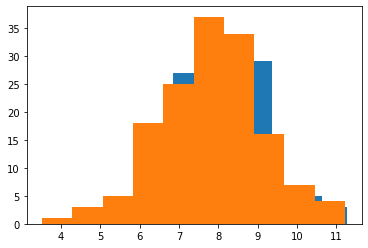

In [42]:
plt.hist(mis['readability'])
plt.hist(true[''])

(array([  4.,   0.,   0.,   2.,   3.,   3.,   4.,   5.,   9., 120.]),
 array([0.29 , 0.361, 0.432, 0.503, 0.574, 0.645, 0.716, 0.787, 0.858,
        0.929, 1.   ]),
 <a list of 10 Patch objects>)

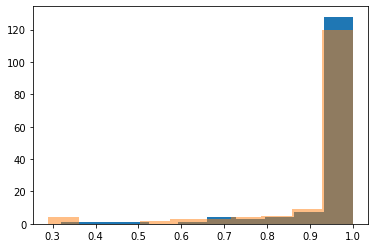

In [46]:
plt.hist(mis['TTR'])
plt.hist(true['TTR'],alpha=0.5)

In [47]:
df.keys()

Index(['readability', 'TTR', 'max_similar', 'min_similar', 'mean_similar',
       'number_identical', 'mcts_ner', 'mcts_adj', 'url_max', 'url_mean',
       'hashtag_max', 'hashtag_mean', 'user_max', 'user_mean', 'emoji_mean',
       'emoji_max', 'exclamation_mean', 'exclamation_max', 'period_mean',
       'period_max', 'question_mean', 'question_max', 'comma_mean',
       'comma_max', 'allcaps_ratio', 'allcaps_inclusion_ratio',
       'titlecase_ratio', 'mean_words', 'retweet_percentage', 'ADJ', 'ADP',
       'ADV', 'AUX', 'CONJ', 'CCONJ', 'DET', 'INTJ', 'NOUN', 'NUM', 'PART',
       'PRON', 'PROPN', 'PUNCT', 'SCONJ', 'SYM', 'VERB', 'X', 'anger', 'fear',
       'anticipation', 'trust', 'surprise', 'sadness', 'joy', 'disgust',
       'positive', 'negative', 'truth'],
      dtype='object')

(array([ 7.,  3., 10., 22., 37., 30., 14., 12.,  6.,  9.]),
 array([ 3.22 ,  4.746,  6.272,  7.798,  9.324, 10.85 , 12.376, 13.902,
        15.428, 16.954, 18.48 ]),
 <a list of 10 Patch objects>)

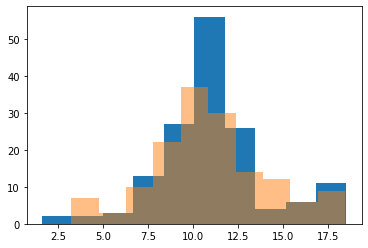

In [90]:
plt.hist(mis['mean_words'])
plt.hist(true['mean_words'], alpha=0.5)

In [83]:
mis['PROPN'].mean()

3.9781999999999593

In [76]:
mis.loc[mis['number_identical'] == 0]

,readability,TTR,max_similar,min_similar,mean_similar,number_identical,mcts_ner,mcts_adj,url_max,url_mean,...,fear,anticipation,trust,surprise,sadness,joy,disgust,positive,negative,truth
author_id,,,,,,,,,,,,,,,,,,,,,
q91ww3hmw5lof951ts61p3mu52oxrl3o,8.66,1.00,0.996152,0.554930,0.772765,0.0,28,41,0,0.00,...,0.863854,0.507409,0.851227,0.571479,0.354750,0.184134,0.155750,0.832165,1.059842,1
6rafm58i0f3qq9q646staz263l7zx23z,7.69,1.00,0.955914,0.247685,0.761811,0.0,59,49,1,0.39,...,0.716131,0.573056,0.996531,0.497483,0.551071,0.397793,0.411991,1.155359,1.284088,1
t72vej72nk7lc5tbfo59icweo0c94no7,7.52,1.00,0.934916,0.380456,0.762878,0.0,45,28,1,1.00,...,0.786985,0.822500,1.027083,0.653559,0.650085,0.658224,0.316376,1.314714,1.320301,1
h56srndge9i25ksdtajjfgsm10e59kgb,6.82,1.00,0.967161,0.216424,0.765084,0.0,44,30,2,0.97,...,0.945178,0.678685,0.618167,0.540023,0.797012,0.336512,0.630702,1.142729,1.380316,1
veiwupaigla1qbijyxu3oujyjumg7wio,9.03,1.00,0.957299,0.568184,0.835051,0.0,3,23,1,1.00,...,0.541884,0.773973,0.896748,0.442411,0.426262,0.828725,0.235580,1.521347,0.650443,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
g0ibdptztphdny4qdkmkvlo78etktkuo,8.09,0.97,0.999638,0.428557,0.770957,0.0,10,21,2,1.68,...,0.717828,0.453619,0.525973,0.294167,0.425439,0.351284,0.283337,0.725871,0.888035,1
7j62tqfxjoaz5byk643ctgenbfjuu99h,9.50,1.00,0.964554,0.595562,0.828081,0.0,6,22,1,1.00,...,0.932036,0.700488,0.779649,0.358534,0.600432,0.569289,0.250985,1.329597,1.282582,1
txx1g7ne2p633i81z15w7lqz8p858pil,7.30,0.99,1.000000,0.174051,0.767271,0.0,22,67,2,0.81,...,0.494334,0.550215,0.721327,0.421167,0.328447,0.442391,0.236937,1.146019,0.648596,1


In [77]:
true.loc[true['number_identical'] == 0]

,readability,TTR,max_similar,min_similar,mean_similar,number_identical,mcts_ner,mcts_adj,url_max,url_mean,...,fear,anticipation,trust,surprise,sadness,joy,disgust,positive,negative,truth
author_id,,,,,,,,,,,,,,,,,,,,,
jztc6t415ocxtnioyvgzddv49j3pcus4,7.55,1.00,0.994065,0.459044,0.807674,0.0,7,69,2,1.30,...,0.941712,0.785565,0.808658,0.499349,0.653708,0.500917,0.448810,1.355151,1.257932,0
8y3vw5wsbj8lefvmwar3v297dbkd4hiq,9.44,1.00,0.941492,0.349205,0.766016,0.0,3,15,2,1.21,...,1.323337,0.842099,0.942329,0.297785,1.010384,0.703067,0.784265,1.348428,1.989328,0
99u7e2kcxz3d8fzaqblow0fgl9u06eeg,7.08,1.00,0.981688,0.420352,0.826342,0.0,13,15,1,0.46,...,0.388705,0.968333,0.897372,0.408657,0.334591,0.933237,0.141939,1.513427,0.547077,0
36w54uf2991wiao1halknad31ezvotiz,8.22,1.00,0.980457,0.536580,0.831101,0.0,27,34,2,0.52,...,0.691363,0.650911,0.805489,0.624226,0.465577,0.410889,0.331345,1.034593,1.106698,0
ryzyq2dmk3gg9oinvwi2ujutu0jzs4iw,5.74,1.00,0.979160,0.526774,0.820488,0.0,4,19,3,1.34,...,0.213311,0.928737,0.682655,0.332544,0.206095,1.133230,0.082655,1.731948,0.397303,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
iqx2tqavqtpmh1kdn5wnt2wvlvt4me97,6.55,0.98,1.000000,0.279901,0.824449,0.0,11,16,2,0.42,...,0.279157,0.693368,0.623603,0.377068,0.216581,0.679103,0.143113,0.993220,0.437569,0
ogecvmquvmgwazab0osmth2eaieiejsv,8.49,1.00,0.985215,0.570259,0.892433,0.0,3,31,1,1.00,...,0.319476,1.125447,1.253349,0.896789,0.308507,1.256070,0.262498,1.901268,0.791314,0
l34d9zzi2gk1784oqmeycg8hffjr5t18,8.76,1.00,0.947288,0.204884,0.788001,0.0,28,54,3,1.72,...,0.873563,0.883675,0.779538,0.424597,0.617172,0.314671,0.242553,1.094922,1.204947,0


(array([20., 50., 46., 21.,  7.,  2.,  3.,  0.,  0.,  1.]),
 array([0.07375501, 0.37734703, 0.68093905, 0.98453108, 1.2881231 ,
        1.59171512, 1.89530714, 2.19889917, 2.50249119, 2.80608321,
        3.10967523]),
 <a list of 10 Patch objects>)

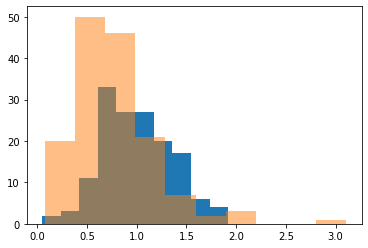

In [65]:
plt.hist(mis['negative'])
plt.hist(true['negative'], alpha=0.5)